

# Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:
* 1- Una variable categòrica (Districte o Barri)
* 2- Una variable numèrica (Preu)
* 3- Una variable numèrica i una categòrica (Districte i Preu)
* 4- Dues variables numèriques (Any o Trimestre i Preu)
* 5- Tres variables (Barri o Districte, Trimestre i Preu)


In [1]:
#importamos las librerias que pudieramos necesitar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#volcamos el data set para extraer el data frame sobre el que trabajaremos, 
#previamente hemos guardado el archivo csv en el mismo repositorio del archivo presente.

df_preulloguer = pd.read_csv('./preu lloguer per trimestre i barri.csv', encoding='utf-8', engine='python')
df_preulloguer

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


# **1º Analizamos el conjunto de datos**

In [3]:
df_preulloguer.shape

(584, 8)

In [4]:
df_preulloguer.ndim

2

In [5]:
df_preulloguer.size

4672

In [6]:
df_preulloguer.dtypes

Any                int64
Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object

In [7]:
df_preulloguer.columns

Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu'],
      dtype='object')

In [8]:
#Comprobamos si nuestro dataframe tiene nulos.
df_preulloguer.isnull()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
579,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False
582,False,False,False,False,False,False,False,False


In [9]:
#Aunque en este caso no aplicaría,añadiendo el .sum(), podemos comprobar que variable acumula los nulos.
df_preulloguer.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [10]:
#Algunas de las operaciones anteriores se pueden resumir con el método .info
# que nos da una visión general de lo que contiene nuestro dataframe
df_preulloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [11]:
#Preu aparece como object y además tiene datos faltantes
df_preulloguer['Preu'][:50]

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
5      887.1
6     1176.7
7     1040.2
8      964.0
9      898.7
10     781.6
11        --
12     810.6
13     799.5
14     778.4
15     807.6
16     788.1
17     829.1
18     990.3
19     927.3
20    1598.2
21    1531.7
22    1263.9
23    1578.0
24    1264.8
25    1294.9
26     990.1
27     959.0
28     745.4
29     859.1
30     910.6
31     865.3
32     817.3
33     741.1
34     791.7
35     795.0
36     668.8
37     716.1
38     700.5
39     741.4
40     827.0
41        --
42     747.4
43     736.5
44     707.2
45     687.2
46        --
47     691.6
48     762.5
49     643.6
Name: Preu, dtype: object

In [12]:
#Estos datos faltantes aparecen en 44 filas
df_preulloguer['Preu'].value_counts()['--']

44

In [13]:
#Localizando los datos faltantes
df_preulloguer.Preu.str.contains('--').value_counts()

False    540
True      44
Name: Preu, dtype: int64

In [14]:
#Pasamos los datos faltantes a valores nulos
df_preulloguer = df_preulloguer.replace({'--':np.nan})

In [15]:
#Convertimos la columna preu que es tipo object en tipo float
df_preulloguer['Preu'] = df_preulloguer['Preu'].astype('float64')

In [16]:
df_preulloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [17]:
#Convertimos los tipo object en variables categoricas
df_preulloguer['Nom_Districte'] = df_preulloguer['Nom_Districte'].astype('category')
df_preulloguer['Nom_Barri']=df_preulloguer['Nom_Barri'].astype('category') 
df_preulloguer['Lloguer_mitja']=df_preulloguer['Lloguer_mitja'].astype('category') 
 
print(*df_preulloguer.dtypes)

int64 int64 int64 category int64 category category float64


# **2º Resumen estadístico**

In [18]:
df_preulloguer.describe(include=['category'])

,Nom_Districte,Nom_Barri,Lloguer_mitja
count,584,584,584
unique,10,73,2
top,Nou Barris,Baró de Viver,Lloguer mitjà mensual (Euros/mes)
freq,104,8,292


In [19]:
df_preulloguer.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.000000,584.000000,584.000000,540.000000
mean,2021.0,2.500000,6.246575,37.000000,442.157222
std,0.0,1.118992,2.790726,21.089371,457.358745
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,1.750000,4.000000,19.000000,12.775000
50%,2021.0,2.500000,7.000000,37.000000,232.750000
75%,2021.0,3.250000,8.000000,55.000000,815.875000
max,2021.0,4.000000,10.000000,73.000000,1816.500000


In [20]:
df_preulloguer.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [21]:
df_preulloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Any             584 non-null    int64   
 1   Trimestre       584 non-null    int64   
 2   Codi_Districte  584 non-null    int64   
 3   Nom_Districte   584 non-null    category
 4   Codi_Barri      584 non-null    int64   
 5   Nom_Barri       584 non-null    category
 6   Lloguer_mitja   584 non-null    category
 7   Preu            540 non-null    float64 
dtypes: category(3), float64(1), int64(4)
memory usage: 27.8 KB


A continuación analizamos las **variables** con el objetivo de simplificar el graficar las visualizaciones:

* **Barrio**

In [22]:
#Miramos la cantidad de barrios que hay: 73
df_preulloguer.Nom_Barri.nunique()

73

In [23]:
df_preulloguer.Nom_Barri.describe()

count               584
unique               73
top       Baró de Viver
freq                  8
Name: Nom_Barri, dtype: object

In [24]:
Lloguer_mes = df_preulloguer.groupby(['Nom_Barri', 'Lloguer_mitja']).mean()
Lloguer_mes

Any  \
Nom_Barri       Lloguer_mitja                                         
Baró de Viver   Lloguer mitjà mensual (Euros/mes)            2021.0   
                Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Can Baró        Lloguer mitjà mensual (Euros/mes)            2021.0   
                Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Can Peguera     Lloguer mitjà mensual (Euros/mes)            2021.0   
...                                                             ...   
les Corts       Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
les Roquetes    Lloguer mitjà mensual (Euros/mes)            2021.0   
                Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
les Tres Torres Lloguer mitjà mensual (Euros/mes)            2021.0   
                Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   

                                                             Trimestre  \
Nom_Barri       Lloguer_mitja                                            
Baró de Viver   Lloguer mitjà mensual (Euros/mes)                  2.5   
                Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Can Baró        Lloguer mitjà mensual (Euros/mes)                  2.5   
                Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Can Peguera     Lloguer mitjà mensual (Euros/mes)                  2.5   
...                                                                ...   
les Corts       Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
les Roquetes    Lloguer mitjà mensual (Euros/mes)                  2.5   
                Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
les Tres Torres Lloguer mitjà mensual (Euros/mes)                  2.5   
                Lloguer mitjà per superfície (Euros/m2 mes)        2.5   

                                                             Codi_Districte  \
Nom_Barri       Lloguer_mitja                                                 
Baró de Viver   Lloguer mitjà mensual (Euros/mes)                       9.0   
                Lloguer mitjà per superfície (Euros/m2 mes)             9.0   
Can Baró        Lloguer mitjà mensual (Euros/mes)                       7.0   
                Lloguer mitjà per superfície (Euros/m2 mes)             7.0   
Can Peguera     Lloguer mitjà mensual (Euros/mes)                       8.0   
...                                                                     ...   
les Corts       Lloguer mitjà per superfície (Euros/m2 mes)             4.0   
les Roquetes    Lloguer mitjà mensual (Euros/mes)                       8.0   
                Lloguer mitjà per superfície (Euros/m2 mes)             8.0   
les Tres Torres Lloguer mitjà mensual (Euros/mes)                       5.0   
                Lloguer mitjà per superfície (Euros/m2 mes)             5.0   

                                                             Codi_Barri  \
Nom_Barri       Lloguer_mitja                                             
Baró de Viver   Lloguer mitjà mensual (Euros/mes)                  58.0   
                Lloguer mitjà per superfície (Euros/m2 mes)        58.0   
Can Baró        Lloguer mitjà mensual (Euros/mes)                  34.0   
                Lloguer mitjà per superfície (Euros/m2 mes)        34.0   
Can Peguera     Lloguer mitjà mensual (Euros/mes)                  47.0   
...                                                                 ...   
les Corts       Lloguer mitjà per superfície (Euros/m2 mes)        19.0   
les Roquetes    Lloguer mitjà mensual (Euros/mes)                  50.0   
                Lloguer mitjà per superfície (Euros/m2 mes)        50.0   
les Tres Torres Lloguer mitjà mensual (Euros/mes)                  24.0   
                Lloguer mitjà per superfície (Euros/m2 mes)        24.0   

                                                                 Preu  
Nom_Barri       Lloguer_mitja                                          
Baró de Viver   Lloguer mitjà

* **Distritos**

In [25]:
#Miramos la cantidad de distritos que hay: 10
df_preulloguer.Nom_Districte.nunique()

10

In [26]:
df_preulloguer.Nom_Districte.describe()

count            584
unique            10
top       Nou Barris
freq             104
Name: Nom_Districte, dtype: object

In [27]:
Lloguer_dis = df_preulloguer.groupby(['Nom_Districte', 'Lloguer_mitja']).mean()
Lloguer_dis

Any  \
Nom_Districte       Lloguer_mitja                                         
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Eixample            Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Gràcia              Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Horta-Guinardó      Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Les Corts           Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Nou Barris          Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Sant Andreu         Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Sant Martí          Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Sants-Montjuïc      Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Sarrià-Sant Gervasi Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   

                                                                 Trimestre  \
Nom_Districte       Lloguer_mitja                                            
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Eixample            Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Gràcia              Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Horta-Guinardó      Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Les Corts           Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Nou Barris          Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Sant Andreu         Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Sant Martí          Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Sants-Montjuïc      Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Sarrià-Sant Gervasi Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   

                                                                 Codi_Districte  \
Nom_Districte       Lloguer_mitja                                                 
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)                       1.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)             1.0   
Eixample            Lloguer mitjà mensual (Euros/mes)                       2.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)             2.0   
Gràcia              Lloguer mitjà mensual (Euros/mes)                       6.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)             6.0   
Horta-Guinardó      Lloguer mitjà me

* **Preu**

Esta columna está dividida en dos tipos de registros, tenemos el precio medio del alquiler del metro cuadrado y el precio medio de la mensualidad. Procedemos a hacer las operaciones necesarias para obtener los datos por separado. 

In [28]:
df_preulloguer['Lloguer_mitja'].value_counts()

Lloguer mitjà mensual (Euros/mes)              292
Lloguer mitjà per superfície (Euros/m2 mes)    292
Name: Lloguer_mitja, dtype: int64

In [29]:
Lloguer_mensualidad = df_preulloguer.loc[df_preulloguer['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
Lloguer_mensualidad

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
506,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
507,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
508,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
509,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


In [30]:
df_preulloguer.groupby(['Nom_Barri','Lloguer_mitja'])['Preu'].mean()

Nom_Barri        Lloguer_mitja                              
Baró de Viver    Lloguer mitjà mensual (Euros/mes)               532.100
                 Lloguer mitjà per superfície (Euros/m2 mes)       7.950
Can Baró         Lloguer mitjà mensual (Euros/mes)               756.500
                 Lloguer mitjà per superfície (Euros/m2 mes)      12.525
Can Peguera      Lloguer mitjà mensual (Euros/mes)                   NaN
                                                                  ...   
les Corts        Lloguer mitjà per superfície (Euros/m2 mes)      14.025
les Roquetes     Lloguer mitjà mensual (Euros/mes)               621.625
                 Lloguer mitjà per superfície (Euros/m2 mes)      11.300
les Tres Torres  Lloguer mitjà mensual (Euros/mes)              1542.725
                 Lloguer mitjà per superfície (Euros/m2 mes)      15.725
Name: Preu, Length: 146, dtype: float64

In [31]:
Lloguer_metros = df_preulloguer.loc[df_preulloguer['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
Lloguer_metros

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


# **3º Resumen gráfico**

### 1-Una variable categórica (Barrio o distrito)

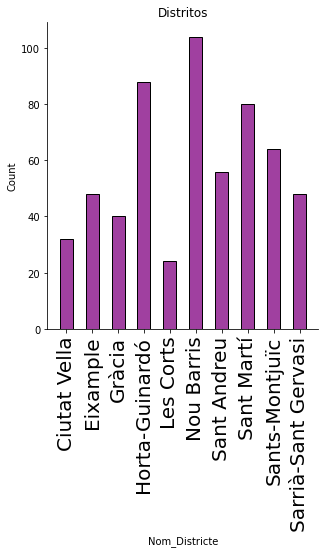

In [32]:
Distritos = sns.displot(df_preulloguer, x='Nom_Districte', shrink=0.5, color='purple')
plt.title('Distritos')
plt.xticks(fontsize=20)
Distritos.set_xticklabels(rotation = 90);

**Interpretación**

Observamos el número de distritos y su aparición en el dataframe, siendo el distrito de Nou Barris el que más impresiones tiene según nos muestra el gráfico de barras.

### 2-Una variable numerica (Preu)


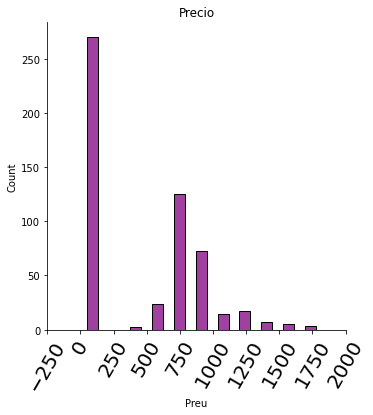

In [33]:
Precio = sns.displot(df_preulloguer, x='Preu', shrink=0.5, color='purple')
plt.title('Precio')
plt.xticks(fontsize=20)
Precio.set_xticklabels(rotation = 60);
plt.savefig('Precio_por_distrito.png', bbox_inches='tight')

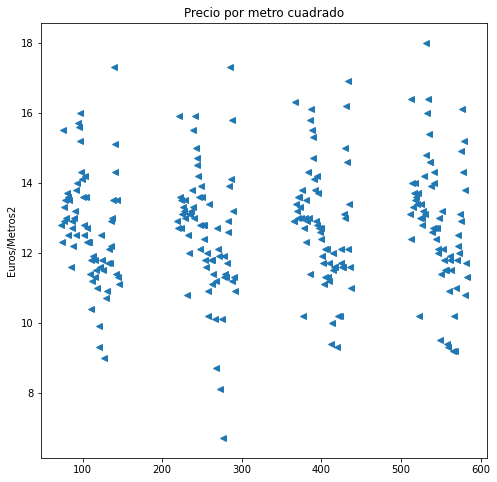

In [39]:
plt.figure(figsize=(8,8))
Precio_por_metros = plt.plot(Lloguer_metros['Preu'], '<')
plt.title('Precio por metro cuadrado')
plt.ylabel('Euros/Metros2')
plt.savefig('Precio_por_metro_cuadrado.png', bbox_inches='tight')

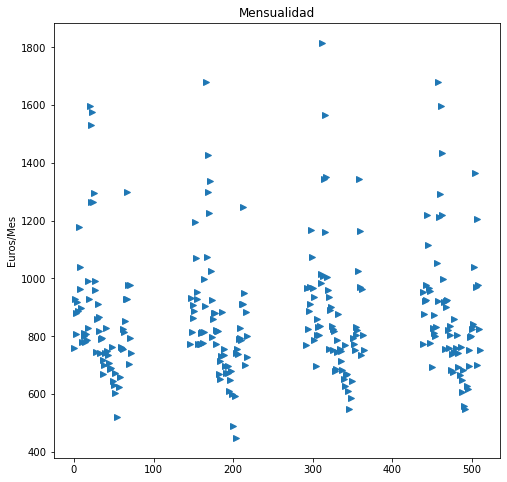

In [40]:
plt.figure(figsize=(8,8))
Precio_mensualidad = plt.plot(Lloguer_mensualidad['Preu'], '>')
plt.title('Mensualidad')
plt.ylabel('Euros/Mes')
plt.savefig('Precio_mensualidad.png', bbox_inches='tight')

**Interpretación**

En esta visualización nos encontramos el hadicap que dentro de la columna Preu, los registros se han tomado con dos condiciones diferentes, por lo que desglosamos en dos gráficas de dispersión diferentes para obtener el precio por metro cuadrado y la media de las mensualidades de los alquileres.

### 3-Una variable numérica y una categórica (Districte i Preu)

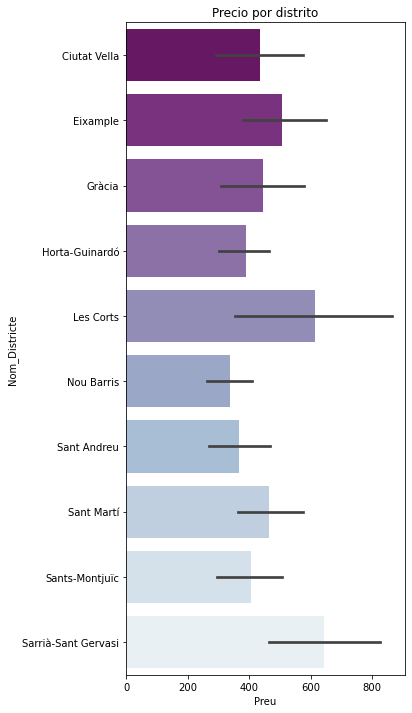

In [36]:
plt.figure(figsize=(5,12))
Precio_por_distrito = sns.barplot(x='Preu', y='Nom_Districte', data=df_preulloguer, orient='h', palette= 'BuPu_r')
plt.title('Precio por distrito')
plt.show()

**Interpretación**

Utilizamos un gráfico de barras para ver los porcentajes de precio por distrito. Se observa que es el distrito de Les Corts el que alcanza un mayor precio.

### 4-Dos variables numericas (Any o Trimestre i Preu)


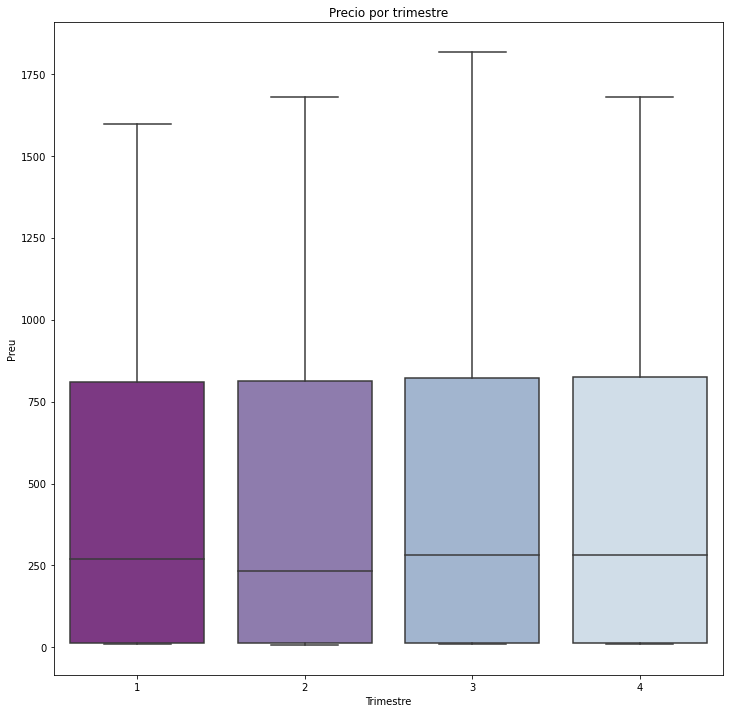

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(figsize=(12,12))
Precio_por_trimestre = sns.boxplot(x='Trimestre', y='Preu', data=df_preulloguer, orient='v', palette= 'BuPu_r')
plt.title('Precio por trimestre')
plt.show()
plt.savefig('Precio_por_trimestre.png', bbox_inches='tight')

**Interpretación**

Utilizamos un gráfico de cajas para ver la distrubición del precio a lo largo de cada trimestre, que nos permite observar que en el tercer trimestre del año se alcanza el precio más alto y aumenta la media de precio, coincidiendo con el época estival.

### 5-Tres variables (Barri o Districte, Trimestre i Preu)

In [ ]:
Lloguer_mensualidad = df_preulloguer.loc[df_preulloguer['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
Lloguer_mensualidad

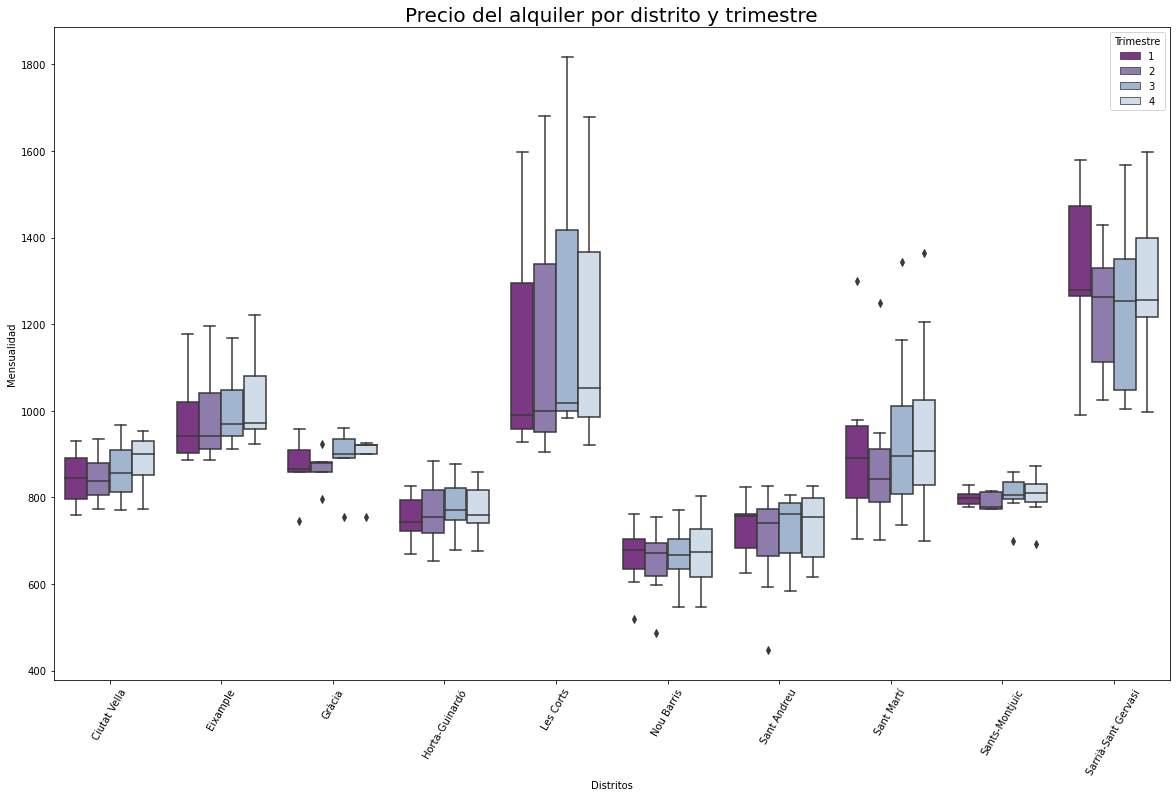

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(20,12))
tres_variables=sns.boxplot(data=Lloguer_mensualidad, x='Nom_Districte', y='Preu', hue='Trimestre', palette='BuPu_r')
tres_variables.set_title('Precio del alquiler por distrito y trimestre', fontsize=20)
plt.xlabel('Distritos')
plt.ylabel('Mensualidad')
plt.xticks(rotation = 60)
plt.show()
plt.savefig('tres_variables_distritos.png', bbox_inches='tight')

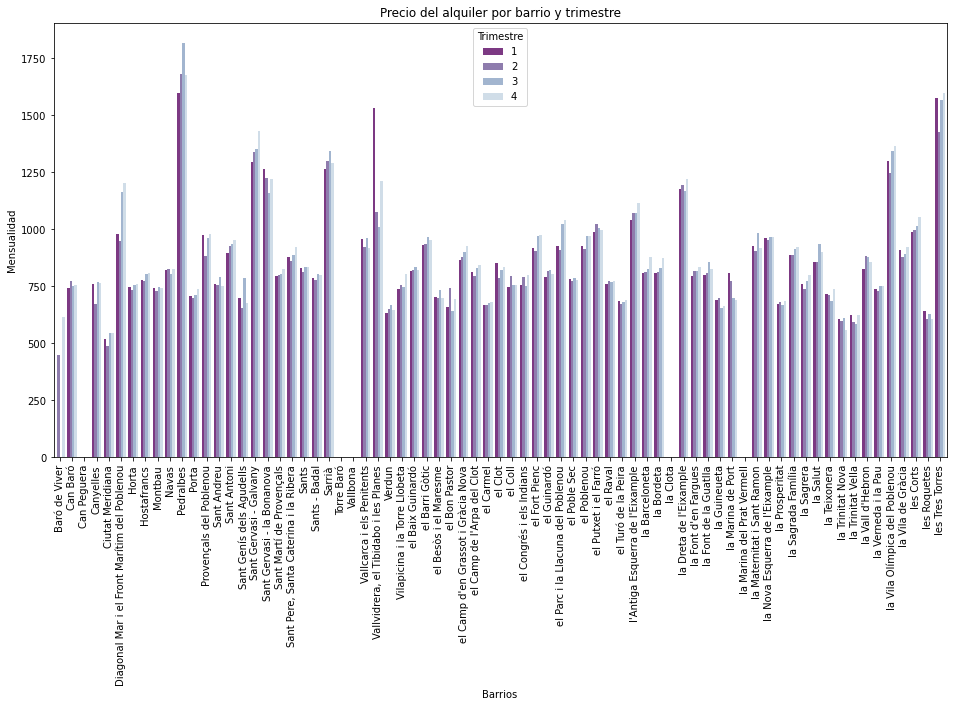

In [61]:
plt.figure(figsize=(16,8))
tres_variables_barrios=sns.barplot(data=Lloguer_mensualidad, x='Nom_Barri', y='Preu', hue='Trimestre', palette='BuPu_r')
tres_variables_barrios.set_title('Precio del alquiler por barrio y trimestre', fontsize=12)
plt.xlabel('Barrios')
plt.ylabel('Mensualidad')
plt.xticks(rotation = 90)
plt.show()


**Interpretación**

En la primera figura volvemos a utilizar un gráfico de cajas (Box plot) en el que vemos la media del precio de la mensualidad segun el distrito al que se le auna una leyenda que nos divide los precios por trimestres, de este modo podemos observar en una misma visualización cual es el precio medio de la mensualidad de un distrito y cómo este va variando según el trimestre.

La segunda figura representa la misma visualización pero en este caso sobre el precio medio de la mensualidad por trimestre de los diferentes barrios de Barcelona, resulta menos claro y muestra además observamos que hay datos faltantes.

# Exercici 2
Exporta els gràfics com imatges o com HTML.

Esta tarea se ha ido desarrolando a la misma vez que se realizaban las visualizaciones gráficas. Adjuntas en el repositorio.

In [ ]:
#plt.savefig('Distritos.png', bbox_inches='tight')

In [ ]:
#plt.savefig('Precio_por_distrito.png', bbox_inches='tight')

In [ ]:
#plt.savefig('Precio_por_metro_cuadrado.png', bbox_inches='tight')

In [ ]:
#plt.savefig('Precio_mensualidad.png', bbox_inches='tight')

In [ ]:
#plt.savefig('Precio_por_trimestre.png', bbox_inches='tight')

In [ ]:
#plt.savefig('tres_variables_distritos.png', bbox_inches='tight')

In [ ]:
#plt.savefig('pie_distritos.png', bbox_inches='tight')


# Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.

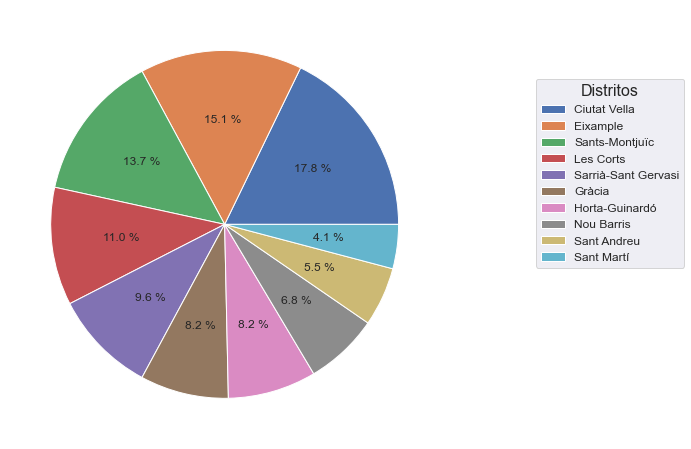

<Figure size 432x288 with 0 Axes>

In [92]:
pie = df_preulloguer['Nom_Districte'].value_counts()
distritos = df_preulloguer['Nom_Districte'].unique()
plt.figure(figsize=(8,8))
plt.pie(pie, autopct='%0.1f %%')
plt.legend(labels = distritos, bbox_to_anchor=(1.05, 1),  loc= 2, borderaxespad=6.,title='Distritos', fontsize='12', title_fontsize='16')
plt.show()
plt.savefig('pie_distritos.png', bbox_inches='tight')

**Interpretación**

La gráfica de tarta o pie muestra el porcentaje de barrios que podemos encontrar por cada distrito, siendo el más amplio el distrito de Ciutat Vella y Sant Martí el que cuenta con menos número de barrios.